In [1]:
from tqdm import tqdm
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
import cv2
import torchvision.transforms as transforms

In [2]:
image_size = 192

In [3]:
class CustomImageDataset(Dataset):
    def read_data_set(self):
        all_img_files = []
        all_mask_files = []

        img_lists = img_files = self.img_lists
        mask_lists = img_files = self.mask_lists

        print("Read imge data from " + self.img_path)
        task1 = tqdm(img_lists)

        for img_file in task1:
            img_file = os.path.join(self.img_path, img_file)
            img = cv2.imread(img_file, 0)
            if img is not None:
                all_img_files.append(img_file)
            else:
                print("ERROR : Not found " + img_file)

        print("Read mask data from " + self.mask_path)
        task2 = tqdm(mask_lists)

        for mask_file in task2:
            mask_file = os.path.join(self.mask_path, mask_file)
            mask = cv2.imread(mask_file, 0)
            if mask is not None:
                all_mask_files.append(mask_file)
            else:
                print("ERROR : Not found " + mask_file)

        print("\nNunber of image : " + str(len(all_img_files)))
        print("Nunber of mask : " + str(len(all_mask_files)))

        if len(all_img_files) != len(all_mask_files):
            print("\nERROR : Number of data mismatch")
        else:
            print("\nComplete!")

        return all_img_files, all_mask_files, len(all_img_files), len(all_mask_files)

    def __init__(self, img_path, mask_path, img_lists, mask_lists, transforms=None):
        print("### Initialize Custom Dataset ###\n")

        self.img_path = img_path
        self.mask_path = mask_path
        self.img_lists = img_lists
        self.mask_lists = mask_lists
        self.image_files_path, self.mask_files_path, self.img_length, self.mask_length = self.read_data_set()
        self.transforms = transforms

        self.length = self.img_length

    def __getitem__(self, index):
        image = cv2.imread(self.image_files_path[index], 0)
        image = cv2.resize(image, (image_size, image_size), interpolation=cv2.INTER_CUBIC)
        mask = cv2.imread(self.mask_files_path[index], 0)
        mask = cv2.resize(mask, (image_size, image_size), interpolation=cv2.INTER_CUBIC)

        if self.transforms is not None:
            image = self.transforms(image)
            mask = self.transforms(mask)

        return {'image': image, 'mask': mask}

    def __len__(self):
        return self.length

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import split_fcn

In [5]:
transform = transforms.Compose([transforms.ToTensor()])
img_path="./Crop_All_Sizes/" + str(image_size) + "/image_cog_" + str(image_size)
mask_path="./Crop_All_Sizes/" + str(image_size) + "/mask_cog_" + str(image_size)

test_num = 2000

load_dataset = False
if load_dataset:
    test_img_lung, test_img_lists, train_img_lung, train_img_lists = split_fcn.split_test_set(img_path, mask_path, test_num)
else:
    test_img_lung, test_img_lists, train_img_lung, train_img_lists = split_fcn.load_dataset()
    
test_set = CustomImageDataset(img_path=img_path, mask_path=mask_path, img_lists=test_img_lists, mask_lists=test_img_lists, transforms=transform)
train_set = CustomImageDataset(img_path=img_path, mask_path=mask_path, img_lists=train_img_lists, mask_lists=train_img_lists, transforms=transform)

 22%|██▏       | 433/2004 [00:00<00:00, 4327.57it/s]

load dataset
### Initialize Custom Dataset ###

Read imge data from ./Crop_All_Sizes/192/image_cog_192


  0%|          | 0/4006 [00:00<?, ?it/s]

Read mask data from ./Crop_All_Sizes/192/mask_cog_192

Nunber of image : 2004
Nunber of mask : 2004

Complete!
### Initialize Custom Dataset ###

Read imge data from ./Crop_All_Sizes/192/image_cog_192


 61%|██████    | 2448/4006 [00:00<00:00, 12198.23it/s]

Read mask data from ./Crop_All_Sizes/192/mask_cog_192


100%|██████████| 4006/4006 [00:00<00:00, 12210.17it/s]


Nunber of image : 4006
Nunber of mask : 4006

Complete!


In [6]:
print(len(train_set))

4006


In [7]:
train_set, val_set = torch.utils.data.random_split(train_set, [len(train_set)-int(len(train_set)/10), int(len(train_set)/10)])

In [8]:
# print(val_img_lung)

In [9]:
print(test_img_lung)
print(len(test_img_lung))

['002', '006', '009', '010', '013', '022', '024', '025', '029', '030', '034', '036', '037', '049', '056', '057', '061', '065', '067', '074', '081', '082', '088', '100', '104', '107', '109', '120', '121', '122', '126', '127', '137', '142', '146', '147', '149', '152', '157', '160', '164', '165', '174', '176', '179', '183', '207', '208', '209', '213', '223', '226', '227', '228', '233', '234', '235', '237', '239', '241', '242', '247', '249', '251', '254', '261', '263', '264', '266', '273', '274', '278', '280', '283', '287', '290', '296', '298', '299', '302', '309', '310', '314', '316', '321', '329', '332', '334', '340', '342', '345', '348', '349', '353', '354', '356', '358', '359', '367', '373', '374', '378', '379', '384', '391', '393', '394', '396', '398', '406', '408', '410', '411', '412', '418']
115


In [10]:
print(train_img_lung)
print(len(train_img_lung))

['001', '003', '004', '005', '007', '008', '011', '012', '015', '016', '017', '018', '019', '020', '023', '026', '028', '031', '032', '033', '035', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '051', '052', '053', '054', '055', '058', '059', '060', '062', '063', '064', '066', '068', '069', '070', '071', '072', '073', '075', '076', '077', '078', '079', '080', '083', '084', '087', '090', '091', '092', '093', '094', '096', '097', '099', '101', '102', '103', '105', '106', '112', '113', '114', '115', '116', '117', '118', '123', '124', '125', '129', '131', '132', '135', '136', '139', '140', '141', '143', '144', '145', '148', '150', '151', '153', '154', '155', '159', '162', '163', '166', '168', '169', '170', '171', '172', '173', '175', '177', '180', '181', '182', '184', '185', '186', '187', '189', '190', '191', '192', '193', '196', '197', '198', '199', '201', '202', '203', '204', '205', '206', '210', '211', '212', '214', '216', '217', '218', '219', '220', '221'

In [11]:
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=True)

In [12]:
import matplotlib.pyplot as plt

plot_size = 3
plot_num = 5

for num, item in enumerate(train_loader):
    images = item['image']
    masks = item['mask']

    images = images.numpy()
    masks = masks.numpy()

    fig = plt.figure()

    for i in range(plot_size):
        ax = fig.add_subplot(1, plot_size, i + 1)
        image = images[i].squeeze()
        ax.imshow(image, 'gray')
        ax.set_xticks([]), ax.set_yticks([])
        i += 1

    fig = plt.figure()

    for i in range(plot_size):
        ax = fig.add_subplot(1, plot_size, i + 1)
        image = masks[i].squeeze()
        ax.imshow(image)
        ax.set_xticks([]), ax.set_yticks([])
        i += 1

    if num > plot_num:
        break

In [13]:
def conv_block(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_dim),
        act_fn,
    )
    return model

def conv_trans_block(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        nn.ConvTranspose2d(in_dim,out_dim, kernel_size=3, stride=2, padding=1,output_padding=1),
        nn.BatchNorm2d(out_dim),
        act_fn,
    )
    return model

def maxpool():
    pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    return pool

def conv_block_2(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        conv_block(in_dim,out_dim,act_fn),
        nn.Conv2d(out_dim,out_dim, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_dim),
    )
    return model

In [14]:
class UnetGenerator(nn.Module):
    def __init__(self,in_dim,out_dim,num_filter):
        super(UnetGenerator,self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.num_filter = num_filter
        act_fn = nn.LeakyReLU(0.2, inplace=True)

        self.down_1 = conv_block_2(self.in_dim,self.num_filter,act_fn)
        self.pool_1 = maxpool()
        self.down_2 = conv_block_2(self.num_filter*1,self.num_filter*2,act_fn)
        self.pool_2 = maxpool()
        self.down_3 = conv_block_2(self.num_filter*2,self.num_filter*4,act_fn)
        self.pool_3 = maxpool()
        self.down_4 = conv_block_2(self.num_filter*4,self.num_filter*8,act_fn)
        self.pool_4 = maxpool()

        self.bridge = conv_block_2(self.num_filter*8,self.num_filter*16,act_fn)

        self.trans_1 = conv_trans_block(self.num_filter*16,self.num_filter*8,act_fn)
        self.up_1 = conv_block_2(self.num_filter*16,self.num_filter*8,act_fn)
        self.trans_2 = conv_trans_block(self.num_filter*8,self.num_filter*4,act_fn)
        self.up_2 = conv_block_2(self.num_filter*8,self.num_filter*4,act_fn)
        self.trans_3 = conv_trans_block(self.num_filter*4,self.num_filter*2,act_fn)
        self.up_3 = conv_block_2(self.num_filter*4,self.num_filter*2,act_fn)
        self.trans_4 = conv_trans_block(self.num_filter*2,self.num_filter*1,act_fn)
        self.up_4 = conv_block_2(self.num_filter*2,self.num_filter*1,act_fn)

        self.out = nn.Sequential(
            nn.Conv2d(self.num_filter,self.out_dim,3,1,1),
            nn.ReLU(),
        )

    def forward(self,input):
        down_1 = self.down_1(input)
        pool_1 = self.pool_1(down_1)
        down_2 = self.down_2(pool_1)
        pool_2 = self.pool_2(down_2)
        down_3 = self.down_3(pool_2)
        pool_3 = self.pool_3(down_3)
        down_4 = self.down_4(pool_3)
        pool_4 = self.pool_4(down_4)

        bridge = self.bridge(pool_4)

        trans_1 = self.trans_1(bridge)
        concat_1 = torch.cat([trans_1,down_4],dim=1)
        up_1 = self.up_1(concat_1)
        trans_2 = self.trans_2(up_1)
        concat_2 = torch.cat([trans_2,down_3],dim=1)
        up_2 = self.up_2(concat_2)
        trans_3 = self.trans_3(up_2)
        concat_3 = torch.cat([trans_3,down_2],dim=1)
        up_3 = self.up_3(concat_3)
        trans_4 = self.trans_4(up_3)
        concat_4 = torch.cat([trans_4,down_1],dim=1)
        up_4 = self.up_4(concat_4)
        out = self.out(up_4)
        return out

In [15]:
net = UnetGenerator(in_dim=1,out_dim=1,num_filter=16)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)

cuda:0


UnetGenerator(
  (down_1): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (down_2): Sequential(
    (0): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool_2): Max

In [16]:
def get_val_loss_and_acc(val_loader):
    val_loss = 0
    DSC = 0

    with torch.no_grad():
        for j, val_data in enumerate(val_loader, 0):
            val_image = val_data['image']
            val_label = val_data['mask']
            val_image, val_label = val_image.to(device), val_label.to(device)
            val_outputs = net(val_image)
                        
            val_loss += criterion(val_outputs, val_label)

            DSC += get_DSC_acc(val_label, val_outputs)

    return val_loss, DSC

In [17]:
def get_DSC_acc(val_label, val_outputs):
        with torch.no_grad():
                GT = val_label.clone().detach()
                GT = GT.cpu().numpy()
                GT[GT > 0.5] = 1
                GT[GT <= 0.5] = 0

                AUTO = val_outputs.clone().detach()
                AUTO = AUTO.cpu().numpy()
                AUTO[AUTO > 0.5] = 1
                AUTO[AUTO <= 0.5] = 0

                A_Intersect_G = np.multiply(AUTO, GT)
                
                DSC = (2 * np.sum(A_Intersect_G)) / (np.sum(AUTO) + np.sum(GT))

        return DSC

In [18]:
def train(epochs, mini_batch, txt_logger=False, model_save=False, early_stopping=False):
    train_losses, val_losses, DSC_acc = [], [], []

    current_lr = 1
    target_lr = 1e-6

    if txt_logger == True:
        f = open("./models/logger-" + str(image_size) + ".txt", 'w')

    for epoch in range(epochs):
        running_loss = 0
        val_loss = 0

        task = tqdm(train_loader)
        
        for i, data in enumerate(task):
            inputs, labels = data['image'].to(device), data['mask'].to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if i % mini_batch == mini_batch - 1:
                with torch.no_grad():
                    train_losses.append(running_loss/mini_batch)

                    val_loss, DSC = get_val_loss_and_acc(val_loader)
                    
                    val_losses.append(val_loss/len(val_loader))
                    DSC_acc.append(DSC/len(val_loader))

                    lr_scheduler.step(val_loss/len(val_loader))

                    for param_group in optimizer.param_groups:
                        current_lr = param_group['lr']

                    task.set_description("Epoch %d || train loss %.6f || val loss %.6f || DSC %.3f" \
                    % (epoch+1, loss.item(), val_loss/len(val_loader), DSC/len(val_loader)))

                    if txt_logger == True:
                        f.write("i %d || Epoch %d || train loss %.6f || val loss %.6f || DSC %.3f\n" % (i+1, epoch+1, \
                        loss.item(), val_loss/len(val_loader), DSC/len(val_loader)))

                    if model_save == True:
                        PATH = "./models/Epoch-%d-val_loss-%.6f.pth" % (epoch+1, val_loss/len(val_loader))
                        torch.save(net.state_dict(), PATH)
                    
                    running_loss = 0
                    val_loss = 0

            if early_stopping == True:
                if current_lr < target_lr:
                    break

    f.close()
    print('Finished Training')

In [19]:
import torch.optim as optim

criterion = nn.MSELoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, verbose=True, patience=10)

train(epochs=50, mini_batch=20, txt_logger=True, model_save=False, early_stopping=True)

Epoch 1 || train loss 0.035512 || val loss 0.040143 || DSC 0.000: 100%|██████████| 113/113 [00:22<00:00,  4.99it/s]
Epoch 2 || train loss 0.031350 || val loss 0.029376 || DSC 0.401: 100%|██████████| 113/113 [00:22<00:00,  4.97it/s]
Epoch 3 || train loss 0.025485 || val loss 0.023743 || DSC 0.529: 100%|██████████| 113/113 [00:22<00:00,  4.94it/s]
Epoch 4 || train loss 0.018548 || val loss 0.021445 || DSC 0.627: 100%|██████████| 113/113 [00:22<00:00,  4.93it/s]
Epoch 5 || train loss 0.017970 || val loss 0.020714 || DSC 0.636: 100%|██████████| 113/113 [00:22<00:00,  4.93it/s]
Epoch 6 || train loss 0.018808 || val loss 0.019264 || DSC 0.670: 100%|██████████| 113/113 [00:22<00:00,  4.92it/s]
Epoch 7 || train loss 0.013575 || val loss 0.018179 || DSC 0.678: 100%|██████████| 113/113 [00:22<00:00,  4.92it/s]
Epoch 8 || train loss 0.019194 || val loss 0.018909 || DSC 0.698: 100%|██████████| 113/113 [00:22<00:00,  4.92it/s]
Epoch 9 || train loss 0.011206 || val loss 0.017739 || DSC 0.696: 100%|█

Epoch   125: reducing learning rate of group 0 to 1.0000e-04.


Epoch 25 || train loss 0.011532 || val loss 0.014242 || DSC 0.767: 100%|██████████| 113/113 [00:23<00:00,  4.86it/s]
Epoch 26 || train loss 0.008117 || val loss 0.013394 || DSC 0.781: 100%|██████████| 113/113 [00:23<00:00,  4.90it/s]
Epoch 27 || train loss 0.008805 || val loss 0.012911 || DSC 0.787: 100%|██████████| 113/113 [00:23<00:00,  4.87it/s]
Epoch 28 || train loss 0.007623 || val loss 0.013048 || DSC 0.787:  54%|█████▍    | 61/113 [00:12<00:19,  2.63it/s]

Epoch   138: reducing learning rate of group 0 to 1.0000e-05.


Epoch 28 || train loss 0.009149 || val loss 0.013307 || DSC 0.781: 100%|██████████| 113/113 [00:23<00:00,  4.87it/s]
Epoch 29 || train loss 0.006914 || val loss 0.013385 || DSC 0.768: 100%|██████████| 113/113 [00:23<00:00,  4.86it/s]
Epoch 30 || train loss 0.008802 || val loss 0.012643 || DSC 0.794: 100%|██████████| 113/113 [00:23<00:00,  4.89it/s]
Epoch 31 || train loss 0.005655 || val loss 0.012787 || DSC 0.790: 100%|██████████| 113/113 [00:23<00:00,  4.87it/s]
Epoch 32 || train loss 0.007698 || val loss 0.013022 || DSC 0.786: 100%|██████████| 113/113 [00:23<00:00,  4.87it/s]
Epoch 33 || train loss 0.009389 || val loss 0.013187 || DSC 0.786:  19%|█▊        | 21/113 [00:04<00:34,  2.66it/s]

Epoch   161: reducing learning rate of group 0 to 1.0000e-06.


Epoch 33 || train loss 0.007925 || val loss 0.013176 || DSC 0.777: 100%|██████████| 113/113 [00:23<00:00,  4.88it/s]
Epoch 34 || train loss 0.007852 || val loss 0.013195 || DSC 0.781: 100%|██████████| 113/113 [00:23<00:00,  4.86it/s]
Epoch 35 || train loss 0.006776 || val loss 0.013359 || DSC 0.777:  35%|███▍      | 39/113 [00:08<00:11,  6.28it/s]
  0%|          | 0/113 [00:00<?, ?it/s]
Epoch 35 || train loss 0.006776 || val loss 0.013359 || DSC 0.777:  35%|███▍      | 39/113 [00:08<00:16,  4.58it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch   172: reducing learning rate of group 0 to 1.0000e-07.




  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]


  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]


  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]


  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Finished Training


In [20]:
test_loader = DataLoader(test_set, batch_size=4, shuffle=True)

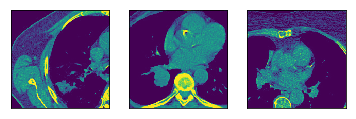

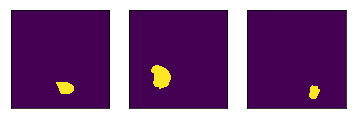

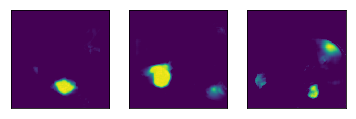

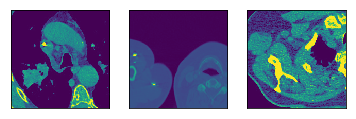

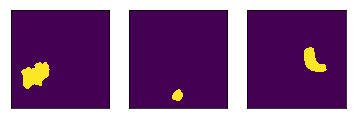

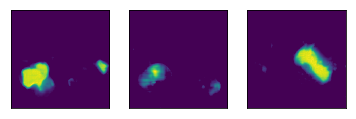

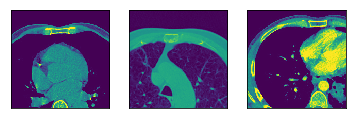

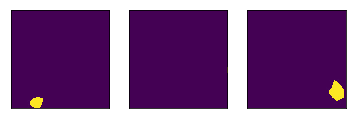

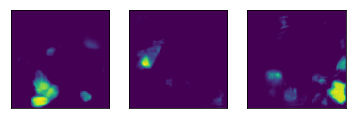

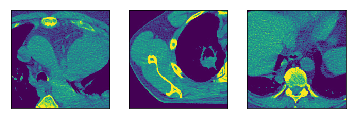

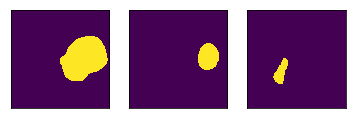

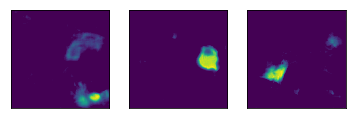

In [21]:
import matplotlib.pyplot as plt

plot_size = 3
plot_num = 2

for num, item in enumerate(test_loader):
    images_tensor = item['image']
    masks_tensor = item['mask']

    inputs = images_tensor.to(device)
    outputs = net(inputs)
    show_out = outputs.detach().cpu().numpy()

    images = images_tensor.numpy()
    masks = masks_tensor.numpy()

    fig = plt.figure()

    for i in range(plot_size):
        ax = fig.add_subplot(1, plot_size, i + 1)
        image = images[i].squeeze()
        ax.imshow(image)
        ax.set_xticks([]), ax.set_yticks([])
        i += 1

    fig = plt.figure()

    for i in range(plot_size):
        ax = fig.add_subplot(1, plot_size, i + 1)
        image = masks[i].squeeze()
        ax.imshow(image)
        ax.set_xticks([]), ax.set_yticks([])
        i += 1
 
    fig = plt.figure()

    for i in range(plot_size):
        ax = fig.add_subplot(1, plot_size, i + 1)
        image = show_out[i].squeeze()
        ax.imshow(image)
        ax.set_xticks([]), ax.set_yticks([])
        i += 1

    if num > plot_num:
        break

In [22]:
import os

result_dir = "./result/" + str(image_size)

try:
    if not(os.path.isdir(result_dir)):
        os.makedirs(os.path.join(result_dir))
except OSError as e:
    if e.errno != errno.EEXIST:
        print("Failed to create directory!!!!!")
        raise


for num, item in enumerate(test_loader):
    images_tensor = item['image']
    masks_tensor = item['mask']

    inputs = images_tensor.to(device)
    outputs = net(inputs)
    show_out = outputs.detach().cpu().numpy()

    images = images_tensor.numpy()
    masks = masks_tensor.numpy()

    for i in range(len(images)):
        image = images[i].squeeze()
        cv2.imwrite(result_dir + '/' + 'IMAGE' + '_' + str(num) +'_' + str(i+1) + '.jpg', image * 255)
        mask = masks[i].squeeze()
        cv2.imwrite(result_dir + '/' + 'GT' + '_' + str(num) +'_' + str(i+1) + '.jpg', mask * 255)
        seg = show_out[i].squeeze()
        cv2.imwrite(result_dir + '/' + 'SEG' + '_' + str(num) +'_' + str(i+1) + '.jpg', seg * 255)
        i += 1